In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = 'https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
df = pd.read_csv(url, error_bad_lines=False)

In [70]:
A =[1, 2, 3, 4, 5, 6]
B =[13, 21, 34]

In [71]:
for i in B:
    A.append(i)
    
A_B = A

print(A_B)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


In [68]:
A.extend(B)
A_B = A
print(A_B)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


In [12]:
a = np.array([1,0,0],[0,1,0],[0,0,1])
a

ValueError: only 2 non-keyword arguments accepted

In [15]:
a = np.array[(1,0,0),(0,1,0),(0,0,1)]
a

TypeError: 'builtin_function_or_method' object is not subscriptable

In [14]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [20]:
fuel_type = df.groupby('fuel_type_code_pudl').agg({'fuel_cost_per_unit_burned':'mean'})
fuel_type.sort_values(by='fuel_cost_per_unit_burned')

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
gas,13.659397
other,18.253856
waste,19.518122
coal,67.421830
oil,168.877086
nuclear,4955.157002


In [29]:
df['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [30]:
df['fuel_qty_burned'].kurt()

651.3694501337732

In [31]:
df['fuel_qty_burned'].skew()

15.851495469109503

In [32]:
df.isnull().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [33]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [34]:
missing = pd.DataFrame(df.isnull().sum())
missing

,0
record_id,0
utility_id_ferc1,0
report_year,0
plant_name_ferc1,0
fuel_type_code_pudl,0
fuel_unit,180
fuel_qty_burned,0
fuel_mmbtu_per_unit,0
fuel_cost_per_unit_burned,0
fuel_cost_per_unit_delivered,0


In [44]:
print(missing.columns)

RangeIndex(start=0, stop=1, step=1)


In [39]:
missing.rename({0:'count'}, inplace=True)

In [46]:
percentage_missing = (180/29523) * 100

In [47]:
percentage_missing

0.609694136774718

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


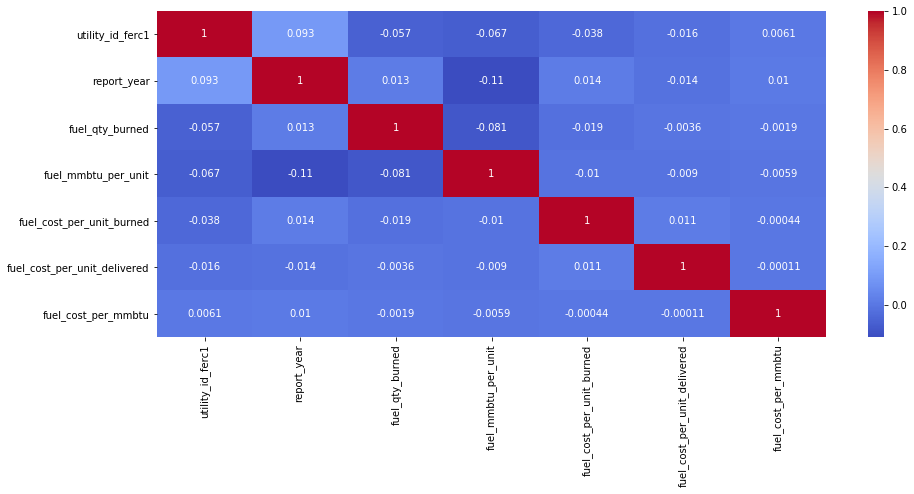

In [49]:
corr = df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [50]:
fuel_per_year = df.groupby('report_year').agg({'fuel_cost_per_unit_delivered':'mean'})
fuel_per_year.sort_values('fuel_cost_per_unit_delivered')

,fuel_cost_per_unit_delivered
report_year,
1999,25.551627
1995,32.735269
2006,38.657484
2005,41.438184
2007,43.325023
2017,46.196861
2002,47.594361
2003,55.663493
2008,58.588197


In [52]:
df_coal = df[df['fuel_type_code_pudl'] == 'coal']

In [53]:
change = df_coal.groupby('report_year').agg({'fuel_cost_per_unit_burned':'sum'})
change

,fuel_cost_per_unit_burned
report_year,
1994,14984.572
1995,14571.785
1996,12694.803
1997,43742.178
1998,11902.597
1999,16303.468
2000,100428.831
2001,15109.012
2002,9171.164


In [60]:
val1 = change.at[1994,'fuel_cost_per_unit_burned' ]

In [59]:
val2 = change.at[1998, 'fuel_cost_per_unit_burned' ]

In [65]:
percent_change = ((val1-val2)/val1) * 100

In [66]:
percent_change

20.56765451826049